<a href="https://www.kaggle.com/hasanbasriakcay/baseline-models-clf-random-ml-automl?scriptVersionId=90245120" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Baseline Models**

![High Jump](https://media.aws.iaaf.org/media/Original/827ec70e-b460-4b2d-bf97-7d9c6be10c5a.jpg)

[Source](https://www.worldathletics.org/disciplines/jumps/high-jump)

In [1]:
%%capture
!pip install pycaret[full]

# Introduction

Hey, thanks for viewing my Kernel!

If you like my work, please, leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! 😊

In [2]:
import pandas as pd
import numpy as np

titanic_train = pd.read_csv('../input/titanic/train.csv')
display(titanic_train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(titanic_train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Random Baseline Models
In the real world, data can not always be predictable.  In these such problems, the best baseline model is a dummy classifier or dummy regressor. That baseline model shows you to your ml model is actually learning or not. You can see how to use random baseline models below.

In [5]:
np.random.seed(0)
random_dim = (1000,3)
random_X = np.random.random(random_dim)
random_reg_y = np.random.random(random_dim[0])
random_clf_y = np.random.randint(random_dim[1], size=random_dim[0])

#train_reg = np.concatenate((random_X, random_reg_y.reshape(random_dim[0], 1)), axis=1)
#col_list = [str(i +1) for i in range(random_dim[1])]
#col_list.append('target')
#train_reg = pd.DataFrame(train_reg, columns=col_list)

train_clf = np.concatenate((random_X, random_clf_y.reshape(random_dim[0], 1)), axis=1)
col_list = [str(i +1) for i in range(random_dim[1])]
col_list.append('target')
train_clf = pd.DataFrame(train_clf, columns=col_list)

train_clf['target'] = train_clf['target'].astype('str')
train_clf

,1,2,3,target
0,0.548814,0.715189,0.602763,0.0
1,0.544883,0.423655,0.645894,1.0
2,0.437587,0.891773,0.963663,1.0
3,0.383442,0.791725,0.528895,1.0
4,0.568045,0.925597,0.071036,1.0
...,...,...,...,...
995,0.698630,0.503697,0.025738,1.0
996,0.774353,0.560374,0.082494,2.0
997,0.475214,0.287293,0.879682,0.0
998,0.284927,0.941687,0.546133,0.0


In [6]:
from pycaret.classification import *

clf = setup(data=train_clf, 
            target='target', 
            silent=True,
            session_id=0)

,Description,Value
0,session_id,0
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,"0.0: 0, 1.0: 1, 2.0: 2"
4,Original Data,"(1000, 4)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.3577,0.5000,0.3333,0.1279,0.1884,0.0000,0.0000,0.0080
gbc,Gradient Boosting Classifier,0.3462,0.4995,0.3433,0.3455,0.3415,0.0122,0.0125,0.2050
knn,K Neighbors Classifier,0.3248,0.4693,0.3172,0.3216,0.3124,-0.0241,-0.0248,0.0700
svm,SVM - Linear Kernel,0.3234,0.0000,0.3190,0.2029,0.1985,-0.0229,-0.0270,0.0380
qda,Quadratic Discriminant Analysis,0.3220,0.4780,0.3087,0.3098,0.2842,-0.0397,-0.0438,0.0090
ada,Ada Boost Classifier,0.3134,0.5022,0.3111,0.3113,0.3082,-0.0350,-0.0352,0.0640
et,Extra Trees Classifier,0.3133,0.4724,0.3099,0.3123,0.3099,-0.0358,-0.0361,0.2770
xgboost,Extreme Gradient Boosting,0.3105,0.4781,0.3088,0.3076,0.3045,-0.0380,-0.0384,36.0480
ridge,Ridge Classifier,0.3018,0.0000,0.2859,0.2275,0.2394,-0.0754,-0.0913,0.0080
dt,Decision Tree Classifier,0.3006,0.4741,0.2986,0.3042,0.3004,-0.0518,-0.0520,0.0100


DummyClassifier(constant=None, random_state=0, strategy='prior')

# Machine Learning Baseline Models
If data is predictable, the second step is to create an ml baseline model. This baseline model shows us which feature is important for prediction and which is not. Generally, ml baseline models use with feature engineering.

In [8]:
from pycaret.classification import *

CAT_FEATURES = ['Sex', 'Embarked']
NUM_FEATURES = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
IGN_FEATURES = ['PassengerId', 'Name', 'Ticket', 'Cabin']

clf = setup(data=titanic_train, 
            target='Survived',
            normalize = True, #normalisation helps some algorithms
            normalize_method = 'robust', #resilient to outliers
            transformation = True, #applies transformation to target column
            transformation_method = 'quantile',
            data_split_shuffle = False, #so that we do not use "future" observations to predict "past" observations
            create_clusters = True,
            feature_interaction = True,
            categorical_features = CAT_FEATURES,
            numeric_features = NUM_FEATURES,
            ignore_features = IGN_FEATURES,
            session_id = 42,
            use_gpu = False,
            silent = True,
            fold = 10,
            n_jobs = -1)

,Description,Value
0,session_id,42
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8172,0.8384,0.7002,0.8221,0.7504,0.6083,0.6183,0.0800
catboost,CatBoost Classifier,0.8140,0.8350,0.6838,0.8247,0.7435,0.5998,0.6100,1.7360
lightgbm,Light Gradient Boosting Machine,0.8092,0.8435,0.7165,0.7912,0.7477,0.5953,0.6012,0.0380
ridge,Ridge Classifier,0.7977,0.0000,0.6473,0.8154,0.7156,0.5624,0.5761,0.0090
rf,Random Forest Classifier,0.7963,0.8450,0.7045,0.7794,0.7325,0.5695,0.5786,0.3100
xgboost,Extreme Gradient Boosting,0.7963,0.8468,0.7043,0.7738,0.7312,0.5685,0.5758,15.4280
lda,Linear Discriminant Analysis,0.7929,0.8433,0.6557,0.8007,0.7140,0.5548,0.5672,0.0100
lr,Logistic Regression,0.7897,0.8410,0.6513,0.7891,0.7092,0.5474,0.5571,0.0550
knn,K Neighbors Classifier,0.7866,0.8207,0.7042,0.7534,0.7228,0.5503,0.5561,0.0700
dt,Decision Tree Classifier,0.7755,0.7607,0.6880,0.7413,0.7075,0.5265,0.5330,0.0120


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
baseline_model = create_model('rf')

baseline_preds = predict_model(baseline_model, raw_score=True)
baseline_preds

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6825,0.7232,0.6800,0.5862,0.6296,0.3545,0.3575
1,0.8254,0.8621,0.6400,0.8889,0.7442,0.6169,0.6361
2,0.7619,0.8389,0.5600,0.7778,0.6512,0.4776,0.4925
3,0.8065,0.8218,0.6250,0.8333,0.7143,0.5724,0.5860
4,0.7903,0.8388,0.8333,0.6897,0.7547,0.5744,0.5823
5,0.8387,0.9172,0.8750,0.7500,0.8077,0.6702,0.6761
6,0.8871,0.9002,0.7917,0.9048,0.8444,0.7565,0.7606
7,0.8548,0.8838,0.6800,0.9444,0.7907,0.6840,0.7057
8,0.7419,0.7827,0.6800,0.6800,0.6800,0.4638,0.4638
9,0.7742,0.8816,0.6800,0.7391,0.7083,0.5246,0.5259


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8172,0.8702,0.6979,0.7701,0.7322,0.5939,0.5956


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Embarked_not_available,...,Fare_multiply_Age,Sex_female_multiply_Pclass,Sex_female_multiply_SibSp,Fare_multiply_Pclass,Fare_multiply_Parch,SibSp_multiply_Fare,Survived,Label,Score_0,Score_1
0,5.199337,-0.832468,-5.199337,-5.199337,-0.905970,0.0,0.0,0.0,1.0,0.0,...,0.754191,0.000000,-0.000000,-4.710443,4.710443,4.710443,0,0,0.9100,0.0900
1,5.199337,-0.832468,-5.199337,-5.199337,0.106997,0.0,0.0,0.0,1.0,0.0,...,-0.089072,0.000000,-0.000000,0.556316,-0.556316,-0.556316,0,0,0.8250,0.1750
2,-1.176113,1.989702,-5.199337,-5.199337,0.738312,0.0,0.0,0.0,1.0,0.0,...,1.469020,-0.000000,-0.000000,-0.868338,-3.838732,-3.838732,0,0,0.9900,0.0100
3,-0.399248,1.777034,-5.199337,-5.199337,-0.209055,0.0,0.0,1.0,0.0,0.0,...,-0.371498,-0.000000,-0.000000,0.083465,1.086949,1.086949,0,0,0.8167,0.1833
4,-1.176113,-0.832468,-5.199337,-5.199337,1.265233,1.0,0.0,0.0,1.0,0.0,...,-1.053266,-1.176113,-5.199337,-1.488057,-6.578374,-6.578374,1,1,0.0100,0.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,-0.399248,-0.368878,-5.199337,-5.199337,-0.135416,0.0,0.0,0.0,1.0,0.0,...,0.049952,-0.000000,-0.000000,0.054065,0.704074,0.704074,0,0,0.9800,0.0200
264,-1.176113,-0.997900,-5.199337,-5.199337,0.641958,1.0,0.0,0.0,1.0,0.0,...,-0.640610,-1.176113,-5.199337,-0.755015,-3.337757,-3.337757,1,1,0.1367,0.8633
265,5.199337,0.076644,0.804303,1.532488,0.282869,1.0,0.0,0.0,1.0,0.0,...,0.021680,5.199337,0.804303,1.470729,0.433493,0.227512,0,0,0.5600,0.4400
266,-1.176113,-0.418966,-5.199337,-5.199337,0.641958,0.0,1.0,0.0,0.0,0.0,...,-0.268958,-0.000000,-0.000000,-0.755015,-3.337757,-3.337757,1,0,0.5100,0.4900


In [11]:
baseline_scores = pull()
baseline_scores

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8172,0.8702,0.6979,0.7701,0.7322,0.5939,0.5956


## Feature Engineering

In [12]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Name
titanic_train_FeaEng = titanic_train.copy()
name_last = titanic_train_FeaEng['Name'].str.split(' ', n=1, expand=True)[1]
title = name_last.str.split(' ', n=1, expand=True)[0]
titanic_train_FeaEng['Title'] = title

name_len = titanic_train_FeaEng['Name'].str.len()
titanic_train_FeaEng['Name_len'] = name_len

tfidf_vec = TfidfVectorizer(max_features=15, token_pattern="\w+")
svd = TruncatedSVD(n_components=10)
tfidf_array = svd.fit_transform(tfidf_vec.fit_transform(titanic_train_FeaEng["Name"]))
for i in range(tfidf_array.shape[1]):
    titanic_train_FeaEng['Name_' + str(i)] = tfidf_array [:,i]

# Cabin
cabin_first = []
cabin_last = []
cabin_len = []

for cabin in titanic_train_FeaEng['Cabin']:
    try:
        re_list = re.split('(\d+)',cabin)
        if len(re_list) > 1:
            cabin_first.append(re_list[0])
            cabin_last.append(int(re_list[-2]))
            cabin_len.append(len(re_list))
        else:
            cabin_first.append('None')
            cabin_last.append(0)
            cabin_len.append(0)
    except:
        cabin_first.append('None')
        cabin_last.append(0)
        cabin_len.append(0)

titanic_train_FeaEng['Cabin_First'] = cabin_first
titanic_train_FeaEng['Cabin_Last'] = cabin_last
titanic_train_FeaEng['Cabin_Len'] = cabin_len

# Ticket
tfidf_vec = TfidfVectorizer(max_features=5, analyzer="char")
svd = TruncatedSVD(n_components=3)
tfidf_array = svd.fit_transform(tfidf_vec.fit_transform(titanic_train_FeaEng["Ticket"]))
for i in range(tfidf_array.shape[1]):
    titanic_train_FeaEng['Ticket_' + str(i)] = tfidf_array [:,i]

new_features = ['Title', 'Name_len','Name_0', 'Name_1', 'Name_2', 'Name_3', 'Name_4', 
                'Name_5', 'Name_6', 'Name_7', 'Name_8', 'Name_9', 'Cabin_First', 
                'Cabin_Last', 'Cabin_Len', 'Ticket_0', 'Ticket_1', 'Ticket_2']
old_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
                'Parch', 'Fare', 'Embarked']

## Features Importance

In [13]:
feature_score_dict = {}

for index, feature in enumerate(new_features):
    old_features_temp = old_features.copy()
    old_features_temp.append(feature)
    titanic_train_FeaEng_temp = titanic_train_FeaEng[old_features_temp].copy()
    
    clf = setup(data=titanic_train_FeaEng_temp, 
            target='Survived',
            normalize = True, #normalisation helps some algorithms
            normalize_method = 'robust', #resilient to outliers
            transformation = True, #applies transformation to target column
            transformation_method = 'quantile',
            data_split_shuffle = False, #so that we do not use "future" observations to predict "past" observations
            create_clusters = True,
            feature_interaction = True,
            session_id = 42,
            use_gpu = False,
            silent = True,
            fold = 10,
            n_jobs = -1)
    
    baseline_model = create_model('rf')
    scores = pull()
    feature_score_dict[feature] = scores

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7302,0.7816,0.6800,0.6538,0.6667,0.4401,0.4404
1,0.7937,0.8468,0.6400,0.8000,0.7111,0.5537,0.5620
2,0.7778,0.8521,0.6400,0.7619,0.6957,0.5227,0.5277
3,0.8387,0.8224,0.7083,0.8500,0.7727,0.6493,0.6558
4,0.8065,0.8635,0.7500,0.7500,0.7500,0.5921,0.5921
5,0.9194,0.9496,0.9583,0.8519,0.9020,0.8339,0.8380
6,0.8871,0.9282,0.7500,0.9474,0.8372,0.7526,0.7646
7,0.8710,0.8719,0.6800,1.0000,0.8095,0.7172,0.7477
8,0.8226,0.8114,0.7200,0.8182,0.7660,0.6240,0.6273
9,0.8226,0.9086,0.6800,0.8500,0.7556,0.6190,0.6285


In [14]:
metric_list = []
feature_list = []
score_list = []

for key in feature_score_dict.keys():
    metric_list.extend(list(feature_score_dict[key].columns))
    score_list.extend(list(feature_score_dict[key].loc['Mean', :]))
    feature_list.extend([key for i in range(len(feature_score_dict[key].columns))])

all_scores_pd = pd.DataFrame()
all_scores_pd['Metric'] = metric_list
all_scores_pd['Feature'] = feature_list
all_scores_pd['Score'] = score_list

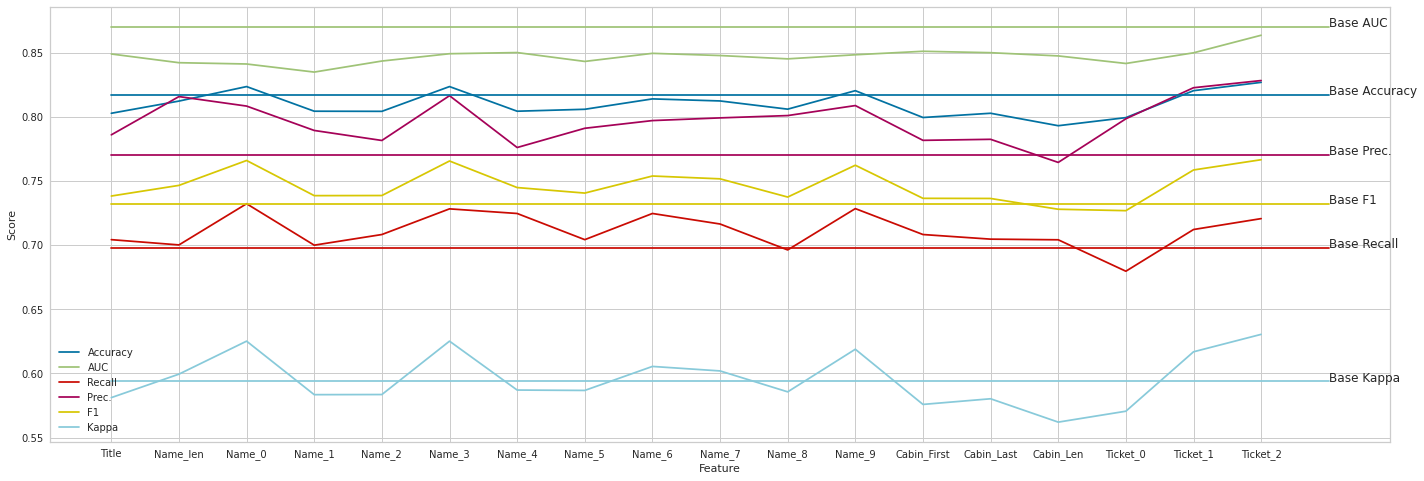

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

col_list = ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa']
score_color = {'Accuracy':'C0', 'AUC':'C1', 'Recall':'C2', 'Prec.':'C3', 'F1':'C4', 'Kappa':'C5'}
fig, ax = plt.subplots(figsize=(24, 8))
all_scores_pd = all_scores_pd.loc[all_scores_pd['Metric'] != 'MCC', :]
sns.lineplot(data=all_scores_pd, x='Feature', y='Score', hue='Metric', ax=ax, palette=score_color)
ax.legend(loc="lower left")
for base_col in col_list:
    base_score = baseline_scores.loc[:, base_col].values[0]
    ax.plot([0, len(all_scores_pd['Feature'].unique())], [base_score, base_score], color=score_color[base_col])
    ax.text(len(all_scores_pd['Feature'].unique()), base_score, 'Base ' + base_col);

# Automated Machine Learning Baseline Models
The final baseline model is the automated ml baseline model. It is a very good model for benchmarking your ml model. If your ml model is better than the automated baseline model, it is a very strong sign that the model can become a product.

## LightAutoML

In [16]:
%%capture
!pip install -U lightautoml

In [17]:
# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.dataset.roles import DatetimeRole
from lightautoml.tasks import Task

import torch

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

N_THREADS = 4 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 300 # Time in seconds for automl run

np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

def acc_score(y_true, y_pred, **kwargs):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int), **kwargs)

def f1_metric(y_true, y_pred, **kwargs):
    return f1_score(y_true, (y_pred > 0.5).astype(int), **kwargs)

task = Task('binary', metric = acc_score)

roles = {
    'target': 'Survived',
    'drop': ['Passengerid', 'Name', 'Ticket'],
}

In [19]:
%%time 
from sklearn.model_selection import StratifiedKFold

n_fold = 3
skf = StratifiedKFold(n_splits=n_fold)
skf.get_n_splits(titanic_train)

acc_list = []
for train_index, test_index in skf.split(titanic_train, titanic_train['Survived']):
    X_train, X_test = titanic_train.loc[train_index, :], titanic_train.loc[test_index, :]
    y = X_test['Survived']
    X_test.drop(['Survived'], axis=1, inplace=True)
    
    automl = TabularUtilizedAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       general_params = {'use_algos': [['linear_l2', 'lgb', 'lgb_tuned']]},
                       reader_params = {'n_jobs': N_THREADS})
    automl.fit_predict(X_train, roles = roles)
    
    test_pred = automl.predict(X_test)
    test_pred = (test_pred.data[:, 0] > 0.5).astype(int)
    acc_list.append(acc_score(y, test_pred))
lightautoml_acc_score = sum(acc_list) / n_fold
print('lightautoml_acc_score: ', lightautoml_acc_score)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: F

lightautoml_acc_score:  0.7957351290684626
CPU times: user 50min 16s, sys: 1min 4s, total: 51min 20s
Wall time: 14min 17s


In [20]:
print('lightautoml_acc_score: ', lightautoml_acc_score)

lightautoml_acc_score:  0.7957351290684626


## H2O AutoML

In [21]:
import h2o
from h2o.automl import H2OAutoML

In [22]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.20.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.20.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp550r2rvp
  JVM stdout: /tmp/tmp550r2rvp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp550r2rvp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.7
H2O_cluster_version_age:,2 months and 22 days
H2O_cluster_name:,H2O_from_python_unknownUser_whh9to
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [23]:
%%time
acc_list = []
for train_index, test_index in skf.split(titanic_train, titanic_train['Survived']):
    X_train, X_test = titanic_train.loc[train_index, :], titanic_train.loc[test_index, :]
    y = X_test['Survived'].astype(int)
    X_test.drop(['Survived'], axis=1, inplace=True)
    
    train_hf = h2o.H2OFrame(X_train.copy())
    test_hf = h2o.H2OFrame(X_test.copy())
    feature_columns = X_train.drop(['Survived', 'PassengerId'], axis=1).columns
    
    aml = H2OAutoML(
        seed=2022, 
        max_runtime_secs=100,
        nfolds = 3,
        exclude_algos = ["DeepLearning"]
    )
    
    aml.train(
        x=list(feature_columns), 
        y='Survived', 
        training_frame=train_hf
    )
    
    test_pred = aml.predict(test_hf)
    test_pred = test_pred.as_data_frame()
    test_pred['test_pred_int'] = (test_pred[['predict']] > 0.5)
    y_pred = test_pred['test_pred_int'].astype(int)
    h2o_acc_score = accuracy_score(y, y_pred)
    acc_list.append(h2o_acc_score)
h2o_tautoml_acc_score = sum(acc_list) / n_fold
print('h2o_tautoml_acc_score: ', h2o_tautoml_acc_score)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
08:49:13.568: _train param, Dropping bad and constant columns: [Name]
08:49:13.568: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
08:49:15.623: _train param, Dropping bad and constant columns: [Name]
08:49:15.623: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
08:49:17.632: _train param, Dropping bad and constant columns: [Name]
08:49:17.633: _response param, Response is numeric, so the regression model will be t

In [24]:
print('h2o_tautoml_acc_score: ', h2o_tautoml_acc_score)

h2o_tautoml_acc_score:  0.8271604938271605


##  AutoML Scores

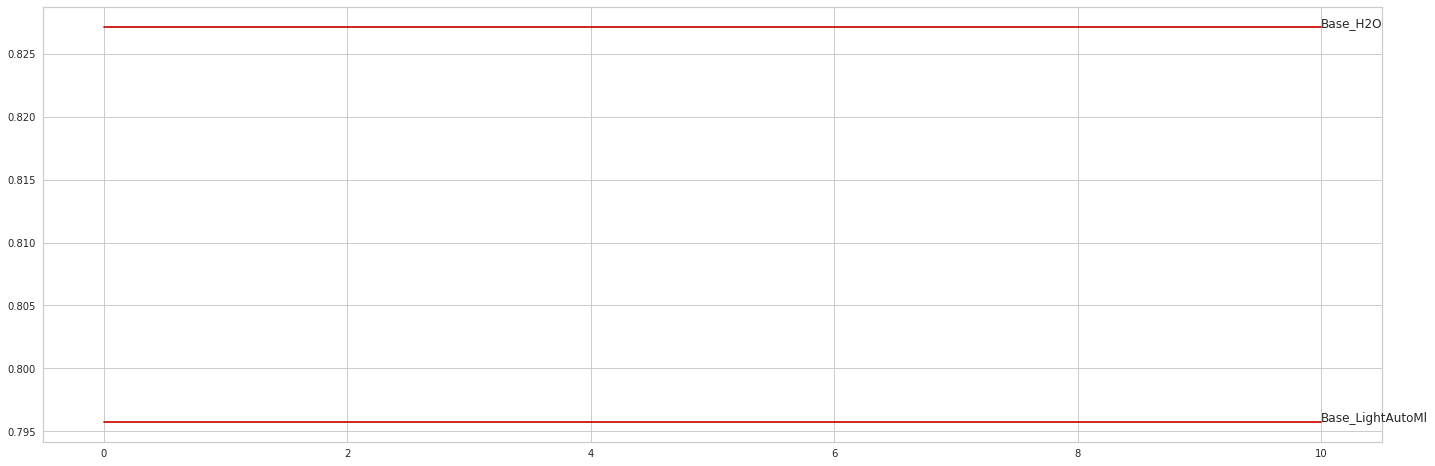

In [25]:
fig, ax = plt.subplots(figsize=(24, 8))
ax.plot([0, 10], [h2o_tautoml_acc_score, h2o_tautoml_acc_score], color='r')
ax.text(10, h2o_tautoml_acc_score, 'Base_H2O')
ax.plot([0, 10], [lightautoml_acc_score, lightautoml_acc_score], color='r')
ax.text(10, lightautoml_acc_score, 'Base_LightAutoMl');